# 3. pandas

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'2.2.3'

## 3.1 基本

`read_csv`

np.float64(2.775)

In [ ]:
# 读取网页内table标签内容，返回table列表，可能多个table
# 需要lxml底层库 解析网页
pd.read_html()

In [51]:
# pd.read_csv('.csv', sep='|', index_col='')
# pd.read_csv('URL', sep='|', index_col='')
# pd.read_csv('URL', sep=r'\s+')

In [52]:
#df.head(10)
#users.tail(10)

In [53]:
#users.describe(include='all')

In [2]:
# train_data[['col1', 'col2', 'col3']].describe()

include 不能直接通过列名

## 3.2 pandas 对象
增强版的 NumPy 结构化数组

### 3.2.1 Series 对象


#### 初识
1. Series对象 带有索引的 一维数组。
2. 通过 .index 和 .values 属性访问
    - values返回类np数组
    - index返回pd.index对象

In [55]:
data = pd.Series([0.25, 0.5, 0.1, 0.2])
values = data.values
index = data.index
data[1]
data[1:3]

1    0.5
2    0.1
dtype: float64

#### Series灵活的特性 ： 数组和字典。
1. 与np数组最大不同：Series对象是显示的索引，索引可以是任意类型。
2. Series对象是特殊的字典。特殊：一类数据映射到另一类数据。
- 就像np数组比py列表高效一样， Series对象比py字典会高效。
- 因此可以从py字典创建一个Series对象
> 因为具有数组和字典双重特性 所以可以对字典进行切片操作！！

3. 创建Series对象
   pd.Series(data, index = index)

In [56]:
data = pd.Series([0.25, 0.5, 0.1, 0.2], 
                index = ['a', 'b', 'c', 'd'], name='score') # name在合并df时候标记为列名
data

a    0.25
b    0.50
c    0.10
d    0.20
Name: score, dtype: float64

In [57]:
popular_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135
}
population = pd.Series(popular_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [58]:
population['California' : 'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [59]:
pd.Series([2, 4, 6]) # 列表或者np数组
pd.Series(5, index = [1,2,3]) # 标量  , 填充到每个索引上
pd.Series({1 : 'A', 2 : 'B'})


1    A
2    B
dtype: object

### 3.2.2 DataFrame对象
- 与Series对象一样，数组和字典双重特性。
- DataFrame对象既有行索引又有列索引。是具有同样索引Series对象的集合
- DataFrame 的基本索引是列索引, 直接[]访问的是列

#### 数组角度
- 如何获取一行数据？不能直接通过[]这样索引，而是loc。
  - 因为这个每一列是一个元素（series)，[]是访问列的

In [8]:
# 创建一个只有列名没有数据的
pd.DataFrame(columns=['col1', 'col2'])

,col1,col2


In [7]:
# 创建一个只有列名没有数据，但指定类型
pd.DataFrame({
 'id':pd.Series(dtype=int),
    'name':pd.Series(dtype=str)
})

,id,name


In [60]:
import pandas as pd
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
    'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
states = pd.DataFrame({'population' : population, 'area' : area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [62]:
states.columns
states.index


Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [2]:
states.values # 返回对应的数组

NameError: name 'states' is not defined

In [ ]:
# 改列名
df.rename(columns={'旧列名': '新列名'}, inplace=True)

# 改行索引名
df.rename(index={'旧行名': '新行名'}, inplace=True)

#### 字典角度
1. 注意不能直接通过行名获取，因为字典看来，字段是列名！

In [9]:
states['area']
#states['Texas'] # !!

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### 创建DataFram对象

In [10]:
pd.DataFrame(population, columns=['population']) # 通过一个series对象创建
pd.DataFrame([ {'a' : i, 'b' : 2 * i} for i in range(4)]) # 元素是字典的列表
pd.DataFrame([{'a':1, 'b':2}, {'c':3, 'd':4}]) 
pd.DataFrame({'population' : population, 'area' : area}) # 具有同样索引多个series对象
pd.DataFrame(np.random.rand(3,2), columns = ['foo', 'bar'], index = ['a', 'b', 'c']) # np二维数组,指定行索引index,列索引columns
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')]) 
pd.DataFrame(A) # 从np结构化数组构建

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### 3.2.3 Index对象
- 可以看作是 **不可变数组** 或 有序集合。
- 默认索引是RangeIndex,

In [11]:
ind = pd.Index([2, 3, 5, 7])
ind

Index([2, 3, 5, 7], dtype='int64')

#### 从不可变数组角度:类似np数组
- 值不可修改！

In [12]:
ind[1]
ind[::2]
print(ind.shape, ind.size, ind.ndim, ind.dtype)

(4,) 4 1 int64


In [13]:
# ind[1] = 0

#### 从有序集合角度：
- 可以使用集合操作。  但必须size相同！

In [72]:
indA = pd.Index([1, 3, 2, 5])
indB = pd.Index([1, 2, 4, 6])
indA | indB

Index([1, 3, 6, 7], dtype='int64')

- so, 可以for

In [71]:
for i in ind:
    print(i)

2
3
5
7


## 3.3　数据取值与选择

### 3.3.1 Series对象

#### 1. 作为字典

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

NameError: name 'pd' is not defined

In [3]:
'a' in data
data.keys()
list(data.items())

NameError: name 'data' is not defined

In [17]:
data['e'] = 1.2 #添加索引和数据

#### 2. 作为数组

In [18]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [19]:
data[0:2] # 隐式整数索引

a    0.25
b    0.50
dtype: float64

In [20]:
data > 0.5

a    False
b    False
c     True
d     True
e     True
dtype: bool

In [21]:
data[data > 0.5]

c    0.75
d    1.00
e    1.20
dtype: float64

In [22]:
data[['a', 'e']] # 花哨索引

a    0.25
e    1.20
dtype: float64

#### 3. 索引器 loc, ilod, ix

In [23]:
data.loc['a'] # 显示索引
data.iloc[1]

np.float64(0.5)

### 3.3.2　DataFrame数据选择方法

插入一列

In [2]:
#train_dataset.insert(0, "WAGE", y_train)

#### 1. DataFrame作为字典, value是Series对象

In [5]:
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
    'New York': 141297, 'Florida': 170312,
    'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
    'New York': 19651127, 'Florida': 19552860,
    'Illinois': 12882135})
data = pd.DataFrame({'area' : area, 'pop' : pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [6]:
data['area']
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [7]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### 2. 看作二维数组
得到的结果也是np数组

通过loc,iloc索引访问 Index对象！

In [8]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [9]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [10]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [11]:
data.iloc[:3, :2] # 按位置索引。  

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [12]:
data.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

iloc依赖整数索引，如果索引被修改过，可能iloc失效

In [14]:
data.loc[['Texas', 'Florida'], ['area']]

,area
Texas,695662
Florida,170312


In [1]:
data.loc[:'Texas', 'area':] # 按照名字索引

NameError: name 'data' is not defined

切片是基于行索引切片的， 最好通过loc显式切片

In [2]:
data[:1] # 表示第一行 而非第一列。  

NameError: name 'data' is not defined

#### 3. 删除行列

In [13]:
import pandas as pd
crime = pd.DataFrame({
      'id':[1,2,3],
    'country':['CH','US','EU'],
    'total':[1,2,3],
    'dead':[4,6,7]
})
crime.set_index('id',inplace=True)

1. del原地删除列。
- 不能用于删除行

In [14]:
del crime['total']

In [15]:
crime

,country,dead
id,,
1,CH,4
2,US,6
3,EU,7


2. drop
- inplace原地修改
- 必须axis指定行列方向

In [21]:
# 删除列
crime.drop(columns=['dead'])

,country
id,
1,CH
2,US
3,EU


In [23]:
# 删除行
crime.drop([1], axis=0)

,country,dead
id,,
2,US,6
3,EU,7


#### 4. 通过dtypes选取列

In [25]:
df = pd.DataFrame({
    'age':[1,2],
    'name':['aa','bb'],
    'married':[False, True]
})

In [27]:
df.dtypes

age         int64
name       object
married      bool
dtype: object

In [29]:
df.select_dtypes(include=['int64'])

,age
0,1
1,2


## 3.4　Pandas数值运算方法
pd底层是np通用函数，

### 3.4.1　通用函数特性1：保留索引
所有通用函数的结果都是保留索引，即np值加索引

In [60]:
rng = np.random.RandomState(42)
s = pd.Series(rng.randint(0, 10, 4))
s

0    6
1    3
2    7
3    4
dtype: int32

In [63]:
s = pd.Series([2.1, 3.2,3,4])
s.quantile(0.25) # 直接调用接口

np.float64(2.775)

In [ ]:
df = pd.DataFrame(rng.randint(0,10, (3,4)), columns=['A', 'B', 'C', 'D'])
df

In [53]:
np.exp(s)
np.sin(df)

NameError: name 's' is not defined

### 3.4.2　通用函数特性：索引对齐
自动对齐 索引不一致、不完整的数据，使其具备共同索引。（并集）

没有对齐的数据缺失值用NAN填充，或者设置参数fill_value

In [ ]:
# 索引不同的两个Series对象
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
    'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
    'New York': 19651127}, name='population')

In [ ]:
population / area

In [ ]:
population.divide(area, fill_value = 0)

In [ ]:
df1 = pd.DataFrame(rng.randint(0,10, (3,4)), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(rng.randint(0,10, (4,2)), columns=['A', 'F'])
print(df1, '\n', df2)

In [ ]:
df1.add(df2, fill_value=0)

使用均值填充！
stack将二维数组压成一维

In [ ]:
fill = df2.stack().mean()
df1.add(df2, fill_value = fill)

### 3.4.3　通用函数：DataFrame与Series的运算


In [ ]:
A = rng.randint(10, size=(3, 4))
A

In [ ]:
df = pd.DataFrame(A, columns=list('QRST'))
df

In [ ]:
df - df.loc[0]

In [ ]:
df.subtract(df['R'], axis=0)

## 3.5　处理缺失值
? 缺失值有3种形式；null, NaN, NA 

pd的缺失值表示：NaN，None对象

### 3.5.2　Pandas的缺失值


1. None：Python对象类型的缺失值

   只有在object数组类型用到

In [ ]:
np.array([1, None, 3 ,4], dtype = object)

2. NaN（全称Not a Number，不是一个数字)： 数值类型缺失
- 是一个特殊的浮点数！！！
- 无论和NaN 进行何种操作，最终结果都是NaN。不会抛出异常
- np有一些特殊函数，忽略nan聚合影响

In [ ]:
x = np.array([1, np.nan, 3, 4])

In [ ]:
x + 2

In [ ]:
np.nanmax(x)

3. Pandas中NaN与None的差异

基本上可以看作等价交换的

In [ ]:
pd.Series([1, np.nan, 3, None])

### 3.5.3　处理缺失值
发现、剔除、替换缺失值
- isnull()
- notnull()
- dropna()
- fillna()

1. 发现

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])
data

In [ ]:
data.isnull() # 返回掩码数组

In [ ]:
data[data.notnull()] # 通过掩码筛选,索引去除

2. 剔除

In [ ]:
data.dropna() # 快速剔除！

In [ ]:
df = pd.DataFrame([[1, np.nan, 2],
    [2, 3, 5],
    [np.nan, 4, 6]])
df

In [ ]:
df.dropna() # 默认剔除行

In [ ]:
df.dropna(axis='columns') # 剔除列

剔除行列对数据影响太大，
- 通过how属性选择策略
- thresh设置阈值：非缺失值最小数量

In [ ]:
df.dropna(how = 'any') # 只要有缺失就剔除

In [ ]:
df.dropna(axis = 1)

In [ ]:
df.dropna(axis='columns', how='all') # 只有一列全部缺失才剔除

In [ ]:
df.dropna(axis='rows', thresh= 3)


3. 填充缺失值

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

In [ ]:
data.fillna(0) # 0填充

In [ ]:
data.fillna(method='ffill') # 通过前面的值填充

In [ ]:
data.fillna(method = 'bfill')

In [ ]:
df

In [ ]:
df.fillna(method = 'ffill', axis=0)

## 3.6　层级索引
三维四维索引

In [ ]:
index = [('California', 2000), ('California', 2010),
    ('New York', 2000), ('New York', 2010),
    ('Texas', 2000), ('Texas', 2010)]
index

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

In [ ]:
populations = [33871648, 37253956,
    18976457, 19378102,
    20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

一级索引缺失忽略就是多级索引的表现形式！。

In [ ]:
pop[:,2010] # 二级索引获取2010年数据

！多级索引如二级索引 可以与 dataframe互换！


In [ ]:
pop_df = pop.unstack()
pop_df

In [ ]:
pop_df.stack()

三级索引！

In [ ]:
pop_df = pd.DataFrame({'total' : pop, 'under18' : [9267089, 9284094,4687374, 4318033,5906301, 6879014]})
pop_df

### 3.6.2　多级索引的创建方法

1. 最直接的就是，index设置为多维数组 (隐式)

In [ ]:
df = pd.DataFrame(np.random.rand(4, 2),
    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
    columns=['data1', 'data2'])
df

2. 元组为键的字典（隐式）

In [ ]:
data = {('California', 2000): 33871648,
    ('California', 2010): 37253956,
    ('Texas', 2000): 20851820,
    ('Texas', 2010): 25145561,
    ('New York', 2000): 18976457,
    ('New York', 2010): 19378102}
pd.Series(data)

3. MultiIndex显示创建

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]) # 规格的多维数组

In [ ]:
pd.MultiIndex.from_tuples([('a', 1),('a', 2),('b', 1),('b', 2)]) # 直接用元组

In [ ]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]]) # 笛卡尔积

3. 为多级索引添加名字

In [ ]:
pop

In [ ]:
pop.index.names = ['state', 'years']

In [ ]:
pop

4. DF的多级列索引

In [ ]:
# 两个多级索引
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
    names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
    names=['subject', 'type'])

In [ ]:
data = np.round(np.random.randn(4,6), 1)
health_data = pd.DataFrame(data, index = index, columns = columns)
health_data

这是一个四维数据

In [ ]:
health_data['Sue'] # 列的一级索引直接访问

In [ ]:
health_data.loc[2013] # 行一级索引

### 3.6.3　多级索引的取值与切片

1. Series多级索引取值

In [ ]:
pop

In [ ]:
pop['California',2000]

In [ ]:
pop['California']

In [ ]:
pop[:, 2000]

In [ ]:
pop[pop > 100]

In [ ]:
pop[['California', 'Texas']]

2. DataFrame多级索引

In [ ]:
health_data

In [ ]:
health_data['Bob', 'HR'] # 列的二级索引访问

In [ ]:
health_data.iloc[:2, :2] # 看作二维数组

Indeslice来快速处理多级索引取值: 比如要访问行索引的第二级

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

### 3.6.4　多级索引行列转换

1. 有序的索引和无序的索引
   - MultiIndex如果不是有序索引，那么切片就会失败！因此必须保证索引有序
   - pd提供了方法来排序索引

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index = index)
data.index.names = ['char', 'int']
data

In [ ]:
# data['a' : 'b'] # 切片失败

In [ ]:
data.sort_index()

2. 索引stack与unstack

In [15]:
pop

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

展开索引， 比如多级，要展1级

In [ ]:
pop.unstack() 

In [ ]:
pop.unstack(level = 0) # 设置第一级索引去列

In [ ]:
pop

3. 索引的设置与重置
- 重置索引，则会生成一个DataFrame。
- 重置时候，需要补充数据列名
- 将这样数据转化为MultiIndex可以设置索引!

In [1]:
pop_flat = pop.reset_index(name = 'population')
pop_flat

NameError: name 'pop' is not defined

set_index()没有inplace必须手动赋值

In [98]:
pop_flat.set_index(['state','years']) # 设置某列为索引

NameError: name 'pop_flat' is not defined

In [99]:
pop_flat.reset_index()

NameError: name 'pop_flat' is not defined

### 3.6.5　多级索引的数据累计方法

In [ ]:
health_data

1. 行计算：

In [ ]:
health_data.groupby(level = 'year').mean()

In [ ]:
health_data.groupby(level = 'visit').mean()

In [ ]:
year_mean = health_data.groupby(level = 'year').mean()
year_mean.groupby(axis = 1, level = 'type').mean()

2. 列计算

In [ ]:
health_data.groupby(axis = 1, level ='type').mean()

## 3.7　合并数据concat
df之间、series之间、df与series之间
- concat axis指定行列

### 3.7.1 concat连接

In [9]:
import pandas as pd
import numpy as np
def make_df(cols, ind):
    data = {c : [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, index= ind)
make_df("ABC", range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [14]:
s1 = pd.Series(np.random.randint(1,10,10))
s2 = pd.Series(np.random.randint(1,10,10))
pd.concat([s1,s2], axis=1, keys=['s1','s2']) # keys重新命名列

,s1,s2
0,7,1
1,7,1
2,3,1
3,5,9
4,4,3
5,6,1
6,3,2
7,3,9
8,1,9
9,5,8


In [7]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

,0,1
1,A,NaN
2,B,NaN
3,C,NaN
4,NaN,D
5,NaN,E
6,NaN,F


In [3]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [4]:
pd.concat([df1, df2], axis = 1)

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


In [5]:
pd.concat([df1, df2], axis = 1)

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


#### 索引重复时候如何连接?
- pd默认是允许的，结果会有重复索引
- 但我们想要结果肯定是唯一索引

1. 捕获重复索引错误。
2. 忽略索引
3. 增加多级索引 

In [32]:
s1=pd.Series(np.random.randint(1,4,10))
s2=pd.Series(np.random.randint(1,3,10))
s3=pd.Series(np.random.randint(10000,30000,10))
d= pd.concat([s1,s2,s3], axis=0)


In [33]:
d.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9],
      dtype='int64')

重复索引合理的不会自动合并

In [23]:
pd.concat([s1,s2,s3], axis=0, ignore_index=True) 

0          1
1          3
2          3
3          3
4          2
       ...  
295    13715
296    29372
297    23352
298    28118
299    24099
Length: 300, dtype: int32

注意这样合并，还是series，通过to_frame()

In [19]:
x = make_df('AB', [0, 1])
y = make_df('AB', [0, 3])
pd.concat([x ,y])


,A,B
0,A0,B0
1,A1,B1
0,A0,B0
3,A3,B3


In [ ]:
try:
    pd.concat([x,y], verify_integrity = True)
except ValueError as e:
    print("ValueError:", e)

In [ ]:
pd.concat([x,y], ignore_index=True) #默认行为忽略

In [ ]:
pd.concat([x, y], keys = ['x', 'y']) # 连接时候加上层级索引

#### 合并:数据缺失NaN
- concat连接时候会出现NaN， 数据缺失。
- 设置join属性，决定合并连接策略

In [27]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5)
print(df6)


    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [28]:
pd.concat([df5, df6])


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [ ]:
 pd.concat([df5, df6], join ='outer') # 默认行为并集

In [ ]:
pd.concat([df5, df6], join = 'inner') # 交集

In [ ]:
# pd.concat([df5, df6], join_axies = [df5.columns])

## 3.8　合并数据集df：merge
- 类似数据库,实现不同数据源的连接：一对一、一对多、多对多
- 源于关系代数，通过一些基本操作来实现复杂操作
- pd.merge和 Serier、DataFrame的join

**contact vs merge**
- contact只是按照行列进行拼接， 重复索引和值缺失
- merge是基于列进行连接匹配,  
merge更加高级，比如内外也可做出contact效果


### 3.8.2　数据连接的类型

1. 一对一连接

In [24]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
df3 = pd.merge(df1, df2)
df3

两个df有一个共同列，merge就会自动根据这个列进行合并！且行数据不冲突！

2. 多对一连接
- 合并两个列时候，有一个列有重复值。
- merge会保留重复值。并填充缺失

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3);print(df4)

In [ ]:
pd.merge(df3, df4)

（2，supervisor） 是缺失的，自动填充了！

3. 多对多连接
- 顾名思义：合并的两个列内部都有重复值

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
    'Engineering', 'Engineering', 'HR', 'HR'],
    'skills': ['math', 'spreadsheets', 'coding', 'linux',
    'spreadsheets', 'organization']})
print(df1, '\n', df5)

场景：显示人员的一种或者多种能力

In [ ]:
pd.merge(df1, df5)

### 3.8.3　设置数据合并的键
- 很多情况下，目的合并的列是不同名的。merge不会自动合并。需要设置哪两个列合并

**1. 参数on**

用在列名相同（merge默认行为）

In [ ]:
print(df1, '\n', df2)

In [ ]:
pd.merge(df1, df2, on = 'employee')

**2. left_on与right_on参数**
- !! 结果中并没有直接去掉列，需要drop方法手动去掉

In [34]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000]})
print(df1, '\n', df3)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 
    name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [35]:
pd.merge(df1, df3, left_on = 'employee', right_on = 'name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [36]:
pd.merge(df1, df3, left_on = 'employee', right_on = 'name').drop('name', axis = 1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


丢弃一列额外方式：直接取出来赋值

In [ ]:
#price_table= price_table[['item_name','item_price']]

3. left_index与right_index参数
- 之前都是合并列。 这里合并索引
- 索引和列同时合并，需要设置_index 和 _on

In [ ]:
print(df1, '\n', df2)

In [ ]:
df1a = df1.set_index('employee') # 将employee列设置为索引
df2a = df2.set_index('employee')
print(df1a, '\n', df2a)

In [ ]:
pd.merge(df1a, df2a, left_index = True, right_index = True)

In [ ]:
print(df1a, '\n', df3)

In [ ]:
pd.merge(df1a, df3, left_index = True, right_on = 'name') # 保留df1a索引, df3合并保留name列

### 3.8.4　设置数据连接的集合操作规则
- 合并两个列时候， 如果一个值出现没有在另外一个列。即需要内连接 外连接规则

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
    'food': ['fish', 'beans', 'bread']},
    columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
    'drink': ['wine', 'beer']},
    columns=['name', 'drink'])
print(df6); print(df7);

In [ ]:
pd.merge(df6, df7) # 默认内连接,即等值连接

In [ ]:
pd.merge(df6, df7, how = 'outer') # 外连接全连接

In [ ]:
pd.merge(df6, df7, how = 'left')

### 3.8.5　重复列名：suffixes参数
- 列名重复，且不是目的合并列。 需要重命名或者添加后缀

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'rank': [3, 1, 4, 2]})
print(df8, '\n', df9)

In [ ]:
pd.merge(df8, df9, on = 'name') # 指定了name列是目标合并列，merge会为其他重复列自动后缀

In [ ]:
pd.merge(df8, df9, on = 'name', suffixes = ["_L", "_R"])  

### 3.8.6　案例：美国各州的统计数据

任务：计算各州人口密度排名
1. 合并pop与缩写表，显示全称
2. 将面积表合并

In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head(), '\n', areas.head(), '\n', abbrevs.head())

In [ ]:
data = pd.merge(pop, abbrevs, left_on = 'state/region', right_on = 'abbreviation').drop('abbreviation', axis = 1)
data

In [ ]:
data.isnull().any() # 检查字段是否有缺失

In [ ]:
data = pd.merge(data, areas, how = 'left')

In [ ]:
data.isnull().any()

In [ ]:
data

In [ ]:
data2010 = data.query("year == 2010 & ages == 'total'")

In [ ]:
data2010.set_index('state', inplace=True) # inplace表示原地修改
data2010

In [ ]:
density = data2010['population'] / data2010['area (sq. mi)']
density

**排序**  
.sort_values(by='quantity', ascending=False)

In [ ]:
density.sort_values(ascending = False, inplace = True)

In [ ]:
density.head()

In [ ]:
density.tail()

## 3.9　累计与分组
- 统计
- 分组groupby

### 3.9.1　行星数据为例
- 内容为2014年以来发现的外行星绕太阳系运动观测数据
- describe方法快速描述整体统计. series、df、groupby都可以使用
- grouby局部分析
- GroupBy对象
- series直接操作：value_counts()

In [22]:
import seaborn as sns
planets = sns.load_dataset('planets') #
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [23]:
print(planets.info())   # 查看数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


In [24]:
print(planets.describe())  # 统计摘要

            number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.000000        0.090706    0.003600     1.350000  1989.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.979500    1.260000    55.250000  2010.000000
75%       2.000000      526.005000    3.040000   178.500000  2012.000000
max       7.000000   730000.000000   25.000000  8500.000000  2014.000000


In [25]:
print(planets.isnull().sum())  # 查看缺失值

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


In [26]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


**groupby常分为分布：分割、应用累计、组合**
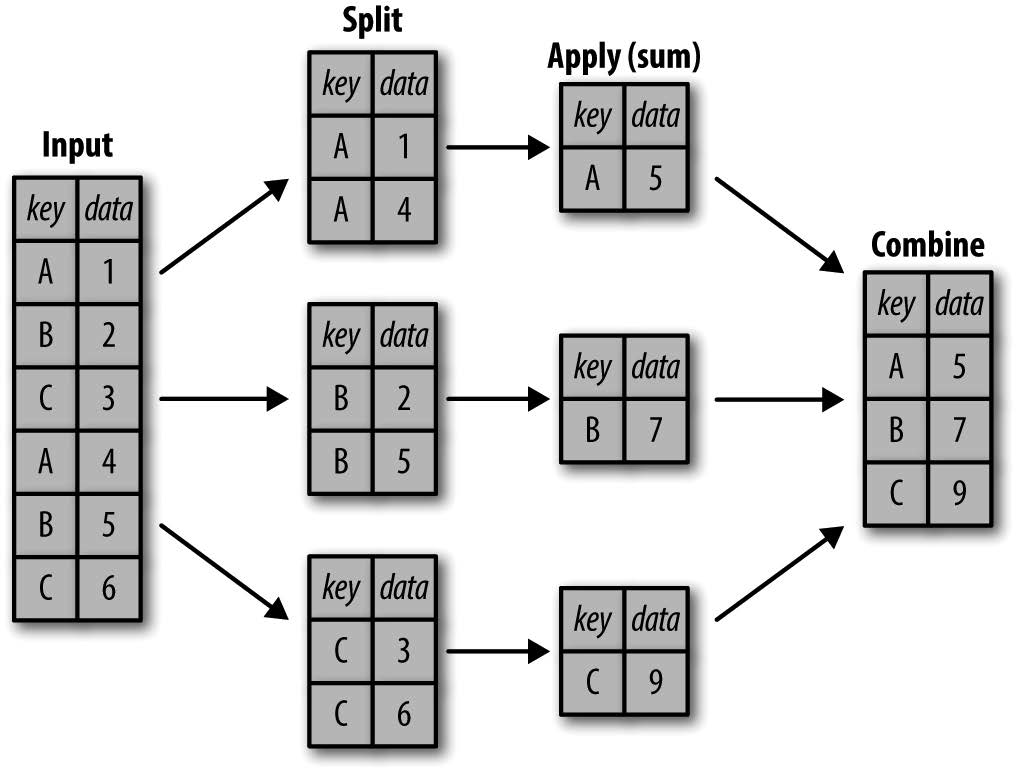

In [27]:
import pandas as pd
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [28]:
df.groupby('key') # 返回的是GroupBy对象!

GroupBy对象
- 魔力：可以看作是特殊形式DF,但是只有在累计函数计算时候，才会计算、显示。（**延迟计算**）

In [29]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


1. 基本操作:按列取值，类似df  
- 可以看作是DF集合，可以按照列取DF
- 比如说从在a列中找出b特征最多的个数

In [30]:
planets.groupby('method')

In [31]:
planets.groupby('method')['orbital_period']

In [32]:
median1 = planets.groupby('method')['orbital_period'].median()
median1

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [33]:
median1.index

Index(['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing',
       'Orbital Brightness Modulation', 'Pulsar Timing',
       'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
       'Transit Timing Variations'],
      dtype='object', name='method')

可以看到分组后index是groupby, 如果要默认整数索引，通过`.reset_index`.
- 方便后续通过列名进行操作 sort等
- name参数为前面操作函数 重新设置列名

In [34]:
planets.groupby('method')['orbital_period'].median().reset_index(name = 'orbital_period_median')

,method,orbital_period_median
0,Astrometry,631.180000
1,Eclipse Timing Variations,4343.500000
2,Imaging,27500.000000
3,Microlensing,3300.000000
4,Orbital Brightness Modulation,0.342887
5,Pulsar Timing,66.541900
6,Pulsation Timing Variations,1170.000000
7,Radial Velocity,360.200000
8,Transit,5.714932
9,Transit Timing Variations,57.011000


In [35]:
planets.groupby('method')['orbital_period'].median().reset_index()

,method,orbital_period
0,Astrometry,631.180000
1,Eclipse Timing Variations,4343.500000
2,Imaging,27500.000000
3,Microlensing,3300.000000
4,Orbital Brightness Modulation,0.342887
5,Pulsar Timing,66.541900
6,Pulsation Timing Variations,1170.000000
7,Radial Velocity,360.200000
8,Transit,5.714932
9,Transit Timing Variations,57.011000


In [36]:
planets.groupby('method').size().reset_index(name='size')

,method,size
0,Astrometry,2
1,Eclipse Timing Variations,9
2,Imaging,38
3,Microlensing,23
4,Orbital Brightness Modulation,3
5,Pulsar Timing,5
6,Pulsation Timing Variations,1
7,Radial Velocity,553
8,Transit,397
9,Transit Timing Variations,4


一起分组多个，比如item_name和对应价格经常对应。

In [ ]:
# chipo.groupby(['item_name', 'item_price']).size()

**2. 按组迭代**

In [42]:
planets.groupby('method')

In [ ]:
# 查看某个分组数据

In [41]:
planets.groupby('method').get_group('Astrometry')

,method,number,orbital_period,mass,distance,year
113,Astrometry,1,246.36,NaN,20.77,2013
537,Astrometry,1,1016.00,NaN,14.98,2010


In [46]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [47]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


**3. 高级操作**：aggregate()、filter()、transform() 和apply()
- 累计：一次性多个统计操作
- 过滤
- 转换  
apply() 对一行或者一列的每个元素操作  
transform() 对整个df或者列操作，确保形状不变！

In [4]:
import pandas as pd
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1': range(6),
    'data2': rng.randint(0, 10, 6)},
    columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [9]:
df.aggregate(['min', 'max']) # 直接使用

,key,data1,data2
min,A,0,0
max,C,5,9


In [3]:
df.groupby('key').aggregate(['min', 'median', 'max']) # 可以自定义一次统计的操作

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [50]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [51]:
def filter_func(x):
    return x['data2'].std() > 4
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [52]:
df.groupby('key').transform(lambda x:x - x.mean()) # 标准化每个元素减去每组的平均值

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [73]:
df.groupby('key').apply(lambda x:x - x.mean()) # 标准化每个元素减去每组的平均值


data1  data2
key                
A   0   -1.5    1.0
    3    1.5   -1.0
B   1   -1.5   -3.5
    4    1.5    3.5
C   2   -1.5   -3.0
    5    1.5    3.0

4. 键分割

下面例子中，decade并不是planets中的一列， 但也可以传入进行分组

In [74]:
decade =  (planets['year'] // 10) * 10
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


series直接操作：`value_counts()`

In [82]:
planets['method'].value_counts().head(1) # 统计一列

method
Radial Velocity    553
Name: count, dtype: int64

## 3.10　数据透视表
- 数据透视表是多维的GroupBy操作，比如二维分割 很方便
- titantic 示例
- 

### 3.10.1 示例:titantic

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3.10.2　手工制作数据透视表

比如：现在要不同性别乘客生存率， 不同性别、船舱等级的生存率

In [ ]:
titanic.groupby('sex')['survived'].mean()

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

### 3.10.3　数据透视表语法
pivot_table来实现上面等价效果

In [ ]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

结果表明：一等舱的女性几乎全部生还，而三等舱的男性只有10之1生还。

**1. 多级数据透视表**
- 层级索引效果

制定了 三层索引，索引侧[sex, age] ,列名侧class

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80]) # 分段
# print(age)
titanic.pivot_table('survived', ['sex', age], 'class')

2. 其他数据透视表选项

In [ ]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins=True)  # margins计数分组

### 3.10.4 示例:美国人的生日

In [ ]:
births = pd.read_csv('births.csv')
births.head()

🗼1. 增加一列，看各年代出生男女比例

In [ ]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc='sum') # aggfunc设置累计函数,默认是均值


In [ ]:
import matplotlib.pyplot as plt
sns.set() # 使用Seaborn风格
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc='sum').plot()
plt.ylabel('total births this year')

🗼2. 不同年代不同日期的日均出生数

In [ ]:
births[births['day'] > 30]

发现，day中有NaN

In [ ]:
births.dropna(inplace = True) #原地修改

In [ ]:
births.isnull().any()

In [ ]:
births['day'].dtype

In [ ]:
births['day'] = births['day'].astype(int)

In [ ]:
births['day'].dtype

剔除异常日期，如0199 ???

In [ ]:
births = births.query('1 <= day <= 31')
births

In [ ]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1] # 均值
sig = 0.74 * (quartiles[2] - quartiles[0]) # 标准差估计值

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

创建一个日期索引

In [ ]:
births.index = pd.to_datetime(10000 * births.year +100 * births.month +births.day, format="%Y%m%d")
births['dayofweek'] = births.index.dayofweek
births

In [ ]:
births.pivot_table('births', index = 'dayofweek', columns= 'decade', aggfunc = 'mean')

In [ ]:
births.pivot_table('births', index = 'dayofweek', columns= 'decade', aggfunc = 'mean').plot()
plt.ylabel('mean births by day')

🗼3. 各年份平均每天出生人数，按照月和日两个维度分组.时间索引

In [ ]:
births

In [ ]:
births_by_date = births.pivot_table('births', index = [births.index.month, births.index.day])
births_by_date

In [ ]:
births_by_date.index =[ pd.to_datetime(f"2012{month:02}{day:02}") for (month, day) in births_by_date.index]
births_by_date.plot()

## 3.11　向量化字符串操作

In [ ]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']

In [ ]:
names = pd.Series(data)
names

In [ ]:
names.str.capitalize()

In [ ]:
names.str.len()

正则化

In [ ]:
names.str.match('[A-Za-z]+')

切片 分割

In [ ]:
names.str[0:3]

In [ ]:
names.str.split().get(-1)

指标变量（one-hot编码）

In [ ]:
full_monte = pd.DataFrame({'name': names,
    'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 
    'B|C|D']})
full_monte

In [ ]:
full_monte['info'].str.get_dummies('|')

### 3.11.3　案例：食谱数据库

数据清理

In [ ]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:",e) # 数据断行

In [ ]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

每一行都是json对象，[]组成json格式。
解析到dataframe

In [ ]:
with open('recipeitems-latest.json', 'r', encoding='utf-8') as f:
    data = (line.strip() for line in f)
    data_json = "[{0}]".format(','.join(data))
recipes = pd.read_json(data_json)
recipes.iloc[0]

In [ ]:
recipes['ingredients'].str.len().describe()

!这个字段最长居然有9000多个字符, 看看是哪个

In [ ]:
recipes.iloc[np.argmax(recipes.ingredients.str.len())]

In [ ]:
recipes['description'].str.contains('[Bb]reakfast').sum() # 一共有3524个早餐

美食推荐系统
根据用户有的食材取搜索

In [ ]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
    'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [ ]:
import re

In [ ]:
spice_df = pd.DataFrame(dict( (spice, recipes['ingredients'].str.contains(spice, re.IGNORECASE))for spice in spice_list)) # 构建bool数组
spice_df

In [ ]:
selection = spice_df.query('parsley & paprika & sage')
selection.index

In [ ]:
recipes['name'][selection.index]

## 3.12　处理时间序列
三种时间：时间戳，时间间隔（天），持续时间（s）

### 3.12.1　Python的日期与时间工具

1. 原生Python的日期与时间工具：datetime(标准库)与dateutil（三方）

In [1]:
from datetime import datetime
datetime(2015, 7, 4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")

In [3]:
date.strftime('%A') # 星期

'Saturday'

2. 时间类型数组：NumPy的datetime64类型
- 是64位整数

In [ ]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

In [ ]:
date + np.arange(12)

3. Pandas的日期与时间工具：理想与现实的最佳解决方案
- 自己的TimeStamp对象实现
- 可以使用一组TimeStamp对象创建时间索引

In [38]:
import pandas as pd
pd.to_datetime("4th of July, 2015")

Timestamp('2015-07-04 00:00:00')

In [ ]:
几列合并一列

In [ ]:
# data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']])

### 3.12.2　Pandas时间序列：用时间作索引

In [15]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
    '2015-07-04', '2015-08-04'])

In [16]:
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [17]:
data['2015'] # 可以直接获取一年的

2015-07-04    2
2015-08-04    3
dtype: int64

### 3.12.3　Pandas时间序列数据结构
TimeStamp, Period, Timedelta 时间结构即系列索引
DateTimeIndex,PeriodIndex,TimedeltaIndex


to_datetime都是时间格式

In [42]:
d = pd.to_datetime('2020',format='%Y')
d

Timestamp('2020-01-01 00:00:00')

In [47]:
d.year

2020

支持replace修改

In [46]:
d.replace(year=d.year - 100)

Timestamp('1920-01-01 00:00:00')

In [10]:
from datetime import datetime

In [11]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [12]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [ ]:
dates - dates[0]

创建有规律时间序列

In [43]:
pd.date_range('20120101','20130101')

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-23', '2012-12-24', '2012-12-25', '2012-12-26',
               '2012-12-27', '2012-12-28', '2012-12-29', '2012-12-30',
               '2012-12-31', '2013-01-01'],
              dtype='datetime64[ns]', length=367, freq='D')

In [ ]:
pd.date_range('20140202', periods=8, freq='h')

In [44]:
pd.period_range('201701', periods=8, freq='M')

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08'],
            dtype='period[M]')

### 3.12.4　时间频率与偏移量

In [ ]:
pd.timedelta_range(0, periods=9, freq='2h30t') #间隔2消失的偏移量

### 3.12.5　重新取样、迁移和窗口

In [ ]:
from pandas_datareader import data
goog = data.DataReader('GOOGL', start='2019-1-1',data_source='stooq')
goog.head()

In [ ]:
goog['Close']

In [ ]:
goog['Close'].plot()

resample以数据累计基础
asfreq以数据取样基础

In [ ]:
goog['Close'].plot()
goog['Close'].resample('BA').mean().plot(style = ':') # 上一年的均值
goog['Close'].asfreq('BA').plot(style = '--') # 年末最后工作日值

In [ ]:
goog_close = goog['Close']
data = goog_close.iloc[:10]
data.asfreq('D').plot(style = '-o') # 生成时间序列,包含休息天
data.asfreq('D', method='bfill').plot(style = '--') # 向后填充

时间迁移：

In [ ]:
data = goog_close.asfreq('D', method='bfill')

In [ ]:
data.plot()
data.shift(120).plot() # 向后迁移

# 设置图例与标签
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(120, 'D')

3. 移动时间窗口

In [ ]:
rolling = goog_close.rolling(365, center=True)
data = pd.DataFrame({'input': goog_close,
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### 3.12.7　案例：美国西雅图自行车统计数据的可视化
弗莱蒙特桥每小时通行的自行车数量

In [18]:
import pandas as pd
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

C:\Users\63517\AppData\Local\Temp\ipykernel_15928\361130387.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [ ]:
data.columns = ['total','West', 'East']

In [ ]:
data.dropna().describe()

In [ ]:
data.plot() # 每hour自行车数量

---  
> `resample()`用于对时间序列数据（即索引DatetimeIndex）重新采样，可以指定时间间隔聚合数据。


In [1]:
import pandas as pd
import numpy as np

# 创建示例数据
dates = pd.date_range(start='2000-01-01', periods=1000, freq='D')
data = pd.DataFrame({'value': np.random.randint(1, 100, size=1000)}, index=dates)

# 1. 按月求和
data.resample('ME').sum()

# 2. 按季度求均值
data.resample('QE').mean()

# 3. 按 10 年聚合
data.resample('10YS').sum()

# 4. 重新采样，并前向填充缺失值
data.resample('D').ffill()


,value
2000-01-01,90
2000-01-02,31
2000-01-03,51
2000-01-04,31
2000-01-05,70
...,...
2002-09-22,66
2002-09-23,29
2002-09-24,40
2002-09-25,94


---

<Axes: xlabel='Date'>

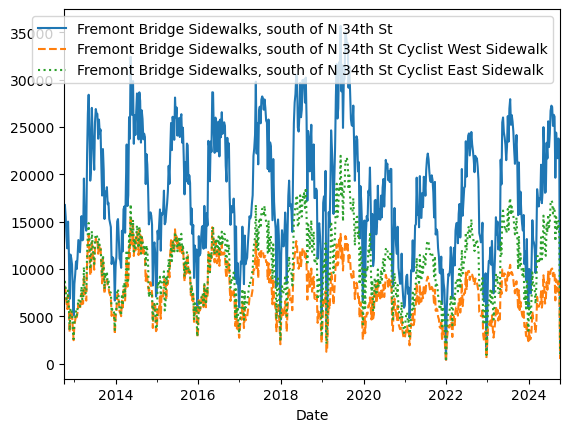

In [19]:
weekly = data.resample('W').sum()
weekly.plot(style = ['-','--',':'])

In [ ]:
daily = data.resample('D').sum() #日
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-']) # 30日移动平均

平滑

In [ ]:
daily.rolling(50, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

## 3.13　高性能Pandas：eval()与query()
直接运行c语言

### 3.13.1　query()与eval()的设计动机：复合代数式

In [ ]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(100000)
y = rng.rand(100000)
%timeit x+y # %timeit单行代码

但处理复合式子很慢，  这样情景对于大数组应该采用更高效的方式

In [ ]:
mask = (x > 0.5) & (y < 0.5)

### 3.13.2　用pandas.eval()实现高性能运算
用字符串的代数式 代替了 运算表达式

In [32]:
import numpy as np
import pandas as pd
nrows, ncols = 100000, 100 
rng = np.random.RandomState(42) 
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) 
                     for i in range(4))

普通方法计算和

In [33]:
%timeit df1+df2+df3+df4

46.3 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


eval字符串代数式计算

In [34]:
%timeit pd.eval('df1+df2+df3+df4')

16.6 ms ± 595 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


!明显eval速度快一倍

**pd.eval()支持的运算**

In [35]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))

1. 算数运算

In [36]:
result1 = -df1 * df2 / (df3 + df4) - df5 
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5') 
np.allclose(result1, result2) # 检查是否近似相等

True

2. 比较运算

In [37]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4) 
result2 = pd.eval('df1 < df2 <= df3 != df4') 
np.allclose(result1, result2) 

True

3. 位运算

In [38]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4) 
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)') 
np.allclose(result1, result2) 

True

In [39]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)') 
np.allclose(result1, result3) 

True

4.  对象属性与索引

In [40]:
result1 = df2.T[0] + df3.iloc[1] 
print(result1)
result2 = pd.eval('df2.T[0] + df3.iloc[1]') 
np.allclose(result1, result2) 

0    841
1    729
2    937
dtype: int32


True

### 3.13.3　用DataFrame.eval()实现列间运算
eval可以直接用列名计算！

In [42]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C']) 
df.head() 

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


正常的eval写法， 通过.引用列（属性）

In [43]:
result1 = (df['A'] + df['B']) / (df['C'] - 1) 
result2 = pd.eval("(df.A + df.B) / (df.C - 1)") 
np.allclose(result1, result2) 

True

更加简洁的，通过df调用eval

In [44]:
result3 = df.eval('(A + B) / (C - 1)') 
np.allclose(result1, result3) 

True

其他常见使用：
1. 使用df.eval增加列

In [45]:
df.eval('D = (A + B) / C', inplace= True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


2. df.eval通过@使用局部变量， 而不仅是上面的列名

In [46]:
column_mean = df.mean(1) 
result1 = df['A'] + column_mean 
result2 = df.eval('A + @column_mean') 
np.allclose(result1, result2) 

True

### 3.13.4　DataFrame.query()方法
更加简化之间的eval查询过滤运算

eval过滤写法

In [51]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)] 
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]') 
np.allclose(result1, result2) 


True

In [52]:
df.A.query('<0.5')

AttributeError: 'Series' object has no attribute 'query'

query写法

In [48]:
Cmean = df['C'].mean() 
result1 = df[(df.A < Cmean) & (df.B < Cmean)] 
result2 = df.query('A < @Cmean and B < @Cmean') 
np.allclose(result1, result2) 

True

In [49]:
result2 = df.query('A < 0.5 and B < 0.5') 
np.allclose(result1, result2) 

ValueError: operands could not be broadcast together with shapes (235,4) (231,4) 

In [50]:
df[]

SyntaxError: invalid syntax (1951995059.py, line 1)

# 未分类

In [ ]:
apply 计算长度
#data['文本长度'] = data['新闻'].apply(len)

In [3]:
import pandas as pd
names =pd.DataFrame(
    {
        'name': ['GOGO','papa','jkjk'],
        'count':[122,3,4]
    }
)
names.set_index('name')

,count
name,
GOGO,122
papa,3
jkjk,4


In [5]:
names['count'].idxmax() # 不好用！ 只能返回一个索引

0

## 3.14 绘图接口
pandas 的绘图功能通过 `plot()` 方法实现，底层依赖 matplotlib，适用于 Series 和 DataFrame。
- Series：单列数据，索引自动作 x 轴，值作 y 轴。
- DataFrame：多列数据，可指定 x 和 y 列，或默认用索引作 x 轴。

通过 `kind` 参数指定：
- `line`：折线图（默认）
- `bar`：柱状图
- `pie`：饼图
- `scatter`：散点图（DataFrame 更常用）
- `area`：面积图
- `box`：箱线图

通过参数设置样式：
- `title`：图表标题
- `color`：颜色
- `figsize`：大小
